# New York City Taxi Trip Duration

## Module Imports

In [52]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Data Loading

In [88]:
!ls input

hugomez_submission.csv test.csv               train.csv


In [89]:
FILEPATH_TRAIN = os.path.join("input", "train.csv")
FILEPATH_TEST = os.path.join("input", "test.csv")
FILEPATH_TRAIN, FILEPATH_TEST

('input/train.csv', 'input/test.csv')

## Data Exploration

In [87]:
df = pd.read_csv(FILEPATH_TRAIN, index_col=0)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [56]:
df_test = pd.read_csv(FILEPATH_TEST)
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 10 columns):
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 122.4+ MB


## Data Preprocessing

### Duplicated values

In [58]:
df.duplicated().sum()

7

In [59]:
df = df.drop_duplicates()
df.duplicated().sum()

0

### Missing values handling

In [60]:
df.isna().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Outliers

Text(0.5,0.98,'Outliers visualization')

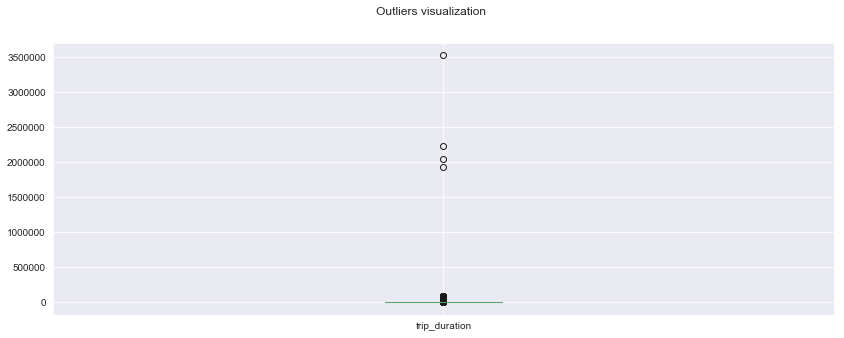

In [61]:
fig, ax = plt.subplots(figsize=(14, 5))
df.boxplot(['trip_duration'])
fig.suptitle('Outliers visualization')

### Categorical variables

In [84]:
# Selection of the categorical variables
CAT_VARS = ['store_and_fwd_flag']

In [85]:
# Transform categorical variables in the train dataframe
for col in CAT_VARS:
    df[col] = df[col].astype('category').cat.codes
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435


In [64]:
# Transform categorical variables in the test dataframe
for col in CAT_VARS:
    df_test[col] = df_test[col].astype('category').cat.codes
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0


## Features Engineering

### Features selection

In [65]:
NUM_VARS = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
CAT_VARS = ['store_and_fwd_flag']
TARGET = 'trip_duration'

In [66]:
numf = NUM_VARS
catf = CAT_VARS

In [67]:
X_train = df.loc[:, numf + catf]
y_train = df[TARGET]
X_test = df_test.loc[:, numf + catf]
X_train.shape, y_train.shape

((1458637, 5), (1458637,))

# Training

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
mrf = RandomForestRegressor(n_estimators=20)
mrf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
crossval_scores = cross_val_score(mrf, X_train, y_train, cv=5, scoring='neg_mean_squared_log_error')
crossval_scores

array([-0.34922453, -0.34724851, -0.34748731, -0.34497495, -0.34763467])

In [72]:
for i in range(len(crossval_scores)):
    crossval_scores[i] = np.sqrt(abs(crossval_scores[i]))
crossval_scores

array([0.59095222, 0.58927796, 0.58948054, 0.58734569, 0.58960552])

# Predictions

In [73]:
y_test_pred = mrf.predict(X_test)
y_test_pred[:5]

array([ 930.1 ,  541.8 ,  691.  , 1039.25, 4981.15])

# Submission

In [81]:
sub = pd.DataFrame({'id': df_test.id, 'trip_duration': y_test_pred})
sub.to_csv('data/hugomez_submission.csv', index=False)

In [82]:
sub.head()

,id,trip_duration
0,id3004672,930.10
1,id3505355,541.80
2,id1217141,691.00
3,id2150126,1039.25
4,id1598245,4981.15
